In [361]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [362]:
df = pd.read_csv('C:/codsoft/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [363]:
df.shape

(418, 12)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [365]:
# extracting the integer types from the ticket column
df['Ticket'] =  df['Ticket'].str.extract(r'([A-Za-z0-9\.\/]+)')


In [366]:
df['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4', '349220', '694', '21228',
       '24065', 'W.E.P.', 'SC/PARIS', '233734', '2692', 'STON/O2.',
       '2696', 'PC', 'C', 'A/5.', '113509', '2698', '113054', '2662',
       'SC/AH', 'C.A.', 'W./C.', '13236', '2682', '342712', '315087',
       '345768', '1601', '349256', '113778', 'SOTON/O.Q.', '237249',
       '11753', 'STON/O', '370374', '11813', '13695', '29105', '19950',
       'SC/A.3', '382652', '349230', '348122', '386525', '349232',
       '237216', '347090', '334914', 'F.C.C.', '330963', '113796', '2543',
       '382653', '349211', '3101297', '113503', '359306', '11770',
       '248744', '368702', '2678', '19924', '349238', '240261', '2660',
       '330844', '364856', '29103', '347072', '345498', 'F.C.', '376563',
       '13905', '350033', '19877', '347471', 'A./5.', '11778', '228414',
       '365235', '347070', '2625', '330920', '383162', '3410', '248734',
       '237734',

In [367]:
#creating ticketlength from ticket column
df['TicketLength'] = df['Ticket'].apply(len)

In [368]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,7


In [369]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
TicketLength      int64
dtype: object

In [370]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
TicketLength      0
dtype: int64

In [371]:
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [372]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [373]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

<Axes: >

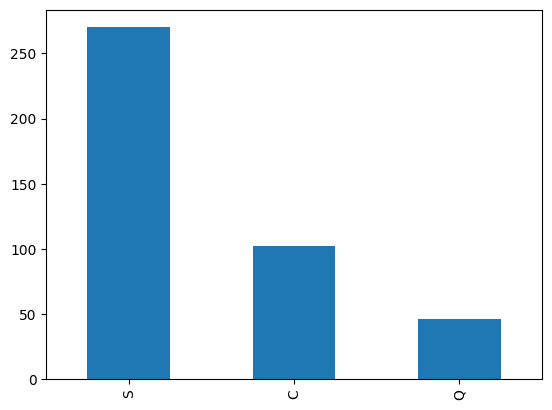

In [374]:
df['Embarked'].value_counts().plot.bar()

In [375]:
df['Age'] = df['Age'].fillna(method = 'ffill')

In [376]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,7
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,4
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,6
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,6
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,4
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4,24.1500,NaN,S,3


In [377]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [378]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
TicketLength      0
dtype: int64

In [379]:
df1 = df.dropna(subset = ['Fare','Age'], axis=0)

In [380]:
df1.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           326
Embarked          0
TicketLength      0
dtype: int64

In [381]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,7


In [382]:
df2 = df1.drop(['PassengerId','Name','Cabin'], axis =1 )

<Axes: >

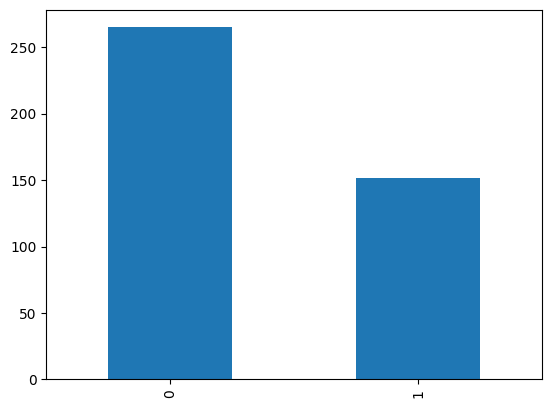

In [383]:
df2['Survived'].value_counts().plot.bar() 

<Axes: xlabel='Survived', ylabel='count'>

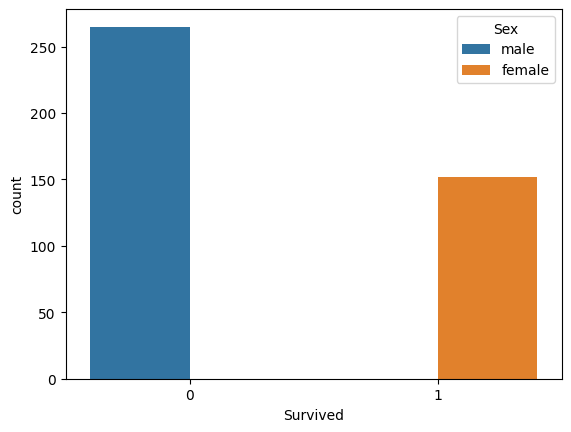

In [384]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df2)

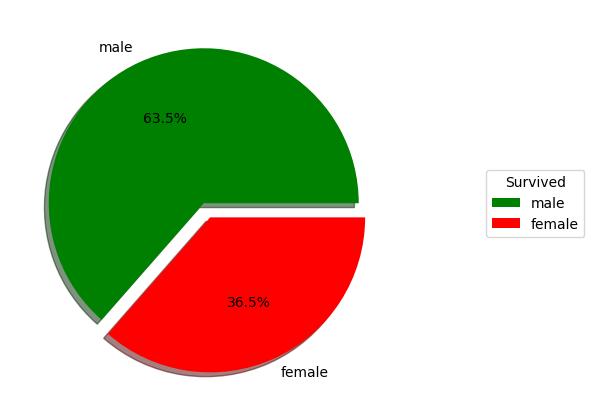

In [385]:
x = df2['Survived'].value_counts()
mlabels = ['male' , 'female']
mcolors = ['green', 'red']
explode = [0, 0.1]
fig, ax = plt.subplots(figsize=(5, 8))
plt.pie(x, labels = mlabels, colors = mcolors, autopct='%1.1f%%' , explode=explode , shadow = True)
plt.legend(title = 'Survived', loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [386]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketLength
0,0,3,male,34.5,0,0,330911,7.8292,Q,6
1,1,3,female,47.0,1,0,363272,7.0000,S,6
2,0,2,male,62.0,0,0,240276,9.6875,Q,6
3,0,3,male,27.0,0,0,315154,8.6625,S,6
4,1,3,female,22.0,1,1,3101298,12.2875,S,7


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'TicketLength'}>, <Axes: >, <Axes: >]],
      dtype=object)

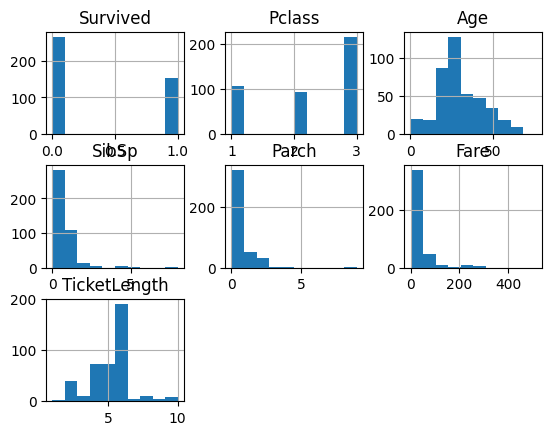

In [387]:
df2.hist()

<Axes: >

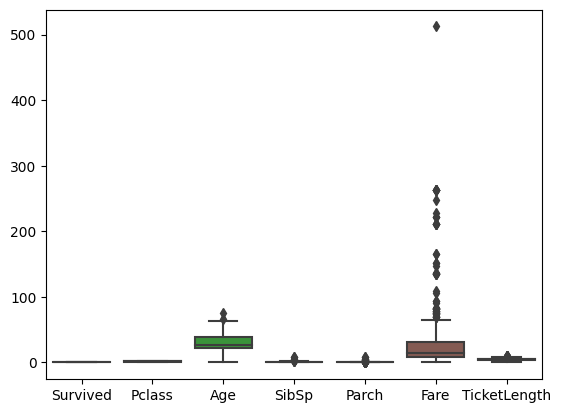

In [388]:
sns.boxplot(df2)

<Axes: xlabel='Fare'>

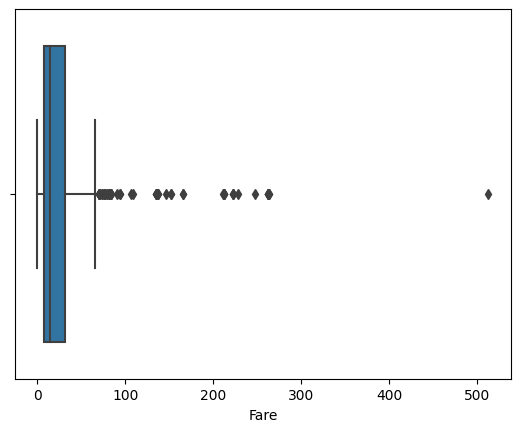

In [389]:
sns.boxplot(x =df2['Fare'])

In [390]:
Q1 = df2['Fare'].describe()[4]
Q3 = df2['Fare'].describe()[6]
print(Q1 , Q3)

7.8958 31.5


In [391]:
IQR = Q3 - Q1
lf = Q1 - IQR*1.5
uf = Q3 + IQR*1.5
print(lf,uf)

-27.5105 66.9063


In [392]:
df2[((df2['Fare'] < -27.5105) | (df2['Fare'] >66.9063))]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketLength
12,1,1,female,23.0,1,0,21228,82.2667,S,5
24,1,1,female,48.0,1,3,PC,262.3750,C,2
48,1,1,female,60.0,0,0,11813,76.2917,C,5
53,1,1,female,28.0,3,2,19950,263.0000,S,5
59,1,1,female,36.0,0,0,PC,262.3750,C,2
64,0,1,male,13.0,2,2,PC,262.3750,C,2
69,1,1,female,60.0,1,4,19950,263.0000,S,5
74,1,1,female,35.0,0,0,113503,211.5000,C,6
75,0,1,male,32.5,0,0,113503,211.5000,C,6
81,0,1,male,67.0,1,0,PC,221.7792,S,2


In [393]:
s = df2[((df2['Fare'] > -27.5105) & (df2['Fare'] <66.9063))]

In [394]:
df3 = df2[~((df2['Fare'] < -27.5105) | (df2['Fare'] >66.9063))]

In [395]:
len(df3) - len(df2)

-55

In [396]:
df3.shape

(362, 10)

<Axes: xlabel='Fare'>

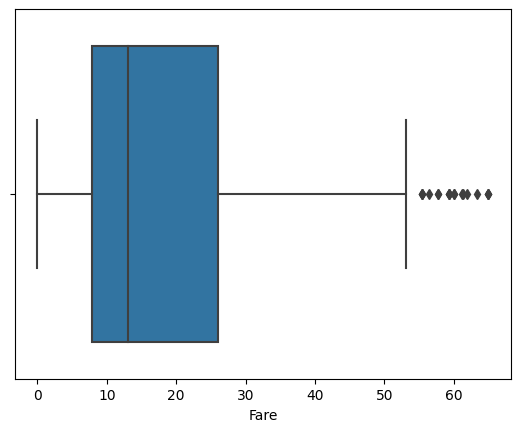

In [397]:
sns.boxplot(x =df3['Fare'])

In [398]:
df3.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
TicketLength    0
dtype: int64

In [399]:
df3['Sex'].value_counts()

male      239
female    123
Name: Sex, dtype: int64

In [400]:
df3['Sex'] = df3['Sex'].replace({'male': 0, 'female': 1})

C:\Users\ACER\AppData\Local\Temp\ipykernel_12128\2562577229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sex'] = df3['Sex'].replace({'male': 0, 'female': 1})


In [401]:
df3.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketLength
0,0,3,0,34.5,0,0,330911,7.8292,Q,6
1,1,3,1,47.0,1,0,363272,7.0000,S,6
2,0,2,0,62.0,0,0,240276,9.6875,Q,6


In [402]:
encoded_df = pd.get_dummies(df3[['Embarked']])

In [403]:
df4 = pd.concat([df3,encoded_df], axis= 1)

In [404]:
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketLength,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,330911,7.8292,Q,6,0,1,0
1,1,3,1,47.0,1,0,363272,7.0000,S,6,0,0,1
2,0,2,0,62.0,0,0,240276,9.6875,Q,6,0,1,0
3,0,3,0,27.0,0,0,315154,8.6625,S,6,0,0,1
4,1,3,1,22.0,1,1,3101298,12.2875,S,7,0,0,1


In [405]:
df4 = df4.drop(['Embarked','Ticket'],axis = 1)

In [406]:
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TicketLength,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,6,0,1,0
1,1,3,1,47.0,1,0,7.0000,6,0,0,1
2,0,2,0,62.0,0,0,9.6875,6,0,1,0
3,0,3,0,27.0,0,0,8.6625,6,0,0,1
4,1,3,1,22.0,1,1,12.2875,7,0,0,1


# After making the data ready for model we will use Logistic regression algorithm for our prediction model

In [407]:
x = df4.drop('Survived', axis =1)
y = df4['Survived']

In [408]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,TicketLength,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,6,0,1,0
1,3,1,47.0,1,0,7.0000,6,0,0,1
2,2,0,62.0,0,0,9.6875,6,0,1,0
3,3,0,27.0,0,0,8.6625,6,0,0,1
4,3,1,22.0,1,1,12.2875,7,0,0,1


In [409]:
y.head(6)

0    0
1    1
2    0
3    0
4    1
5    0
Name: Survived, dtype: int64

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print('******************')
print(y_train.shape)
print(y_test.shape)


(289, 10)
(73, 10)
******************
(289,)
(73,)


In [411]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()

In [412]:
logistic_model.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [413]:
predict_test = logistic_model.predict(X_test)
print('Target on test data',predict_test) 

Target on test data [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1]


In [414]:
score = logistic_model.score(X_train, y_train)
print('accuracy_score overall :', score)

accuracy_score overall : 1.0


# prediction Test

In [415]:
df4.iloc[5]

Survived         0.000
Pclass           3.000
Sex              0.000
Age             14.000
SibSp            0.000
Parch            0.000
Fare             9.225
TicketLength     4.000
Embarked_C       0.000
Embarked_Q       0.000
Embarked_S       1.000
Name: 5, dtype: float64

In [416]:
#test case for survival - 0
#assigning  the test input in a variable  for prediction
test_input0 = [[3,0,14,0,0,9.225,4,0,0,1]]

In [417]:
prediction = logistic_model.predict(test_input)
print(f"Prediction: {prediction}")

Prediction: [1]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [418]:
df4.iloc[4]

Survived         1.0000
Pclass           3.0000
Sex              1.0000
Age             22.0000
SibSp            1.0000
Parch            1.0000
Fare            12.2875
TicketLength     7.0000
Embarked_C       0.0000
Embarked_Q       0.0000
Embarked_S       1.0000
Name: 4, dtype: float64

In [419]:
#test case for survival - 0
#assigning  the test input in a variable  for prediction
test_input1 = [[3,1,22,1,1,12.2875,7,0,0,1]]

In [420]:
prediction = logistic_model.predict(test_input1)
print(f"Prediction: {prediction}")

Prediction: [1]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [421]:
df4.iloc[10]

Survived         0.0000
Pclass           3.0000
Sex              0.0000
Age             21.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8958
TicketLength     6.0000
Embarked_C       0.0000
Embarked_Q       0.0000
Embarked_S       1.0000
Name: 10, dtype: float64

In [422]:
test_input_ex2= [[3,0,21,0,0,7.8958,6,0,0,1]]

In [423]:
prediction = logistic_model.predict(test_input_ex2)
print(f"Prediction: {prediction}")

Prediction: [0]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [424]:
df4.iloc[13]

Survived         1.000
Pclass           1.000
Sex              1.000
Age             47.000
SibSp            1.000
Parch            0.000
Fare            61.175
TicketLength     6.000
Embarked_C       0.000
Embarked_Q       0.000
Embarked_S       1.000
Name: 14, dtype: float64

In [425]:
test_input_ex3= [[1,1,47,1,0,61.175,6,0,0,1]]


In [426]:
prediction = logistic_model.predict(test_input_ex3)
print(f"Prediction: {prediction}")

Prediction: [1]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
